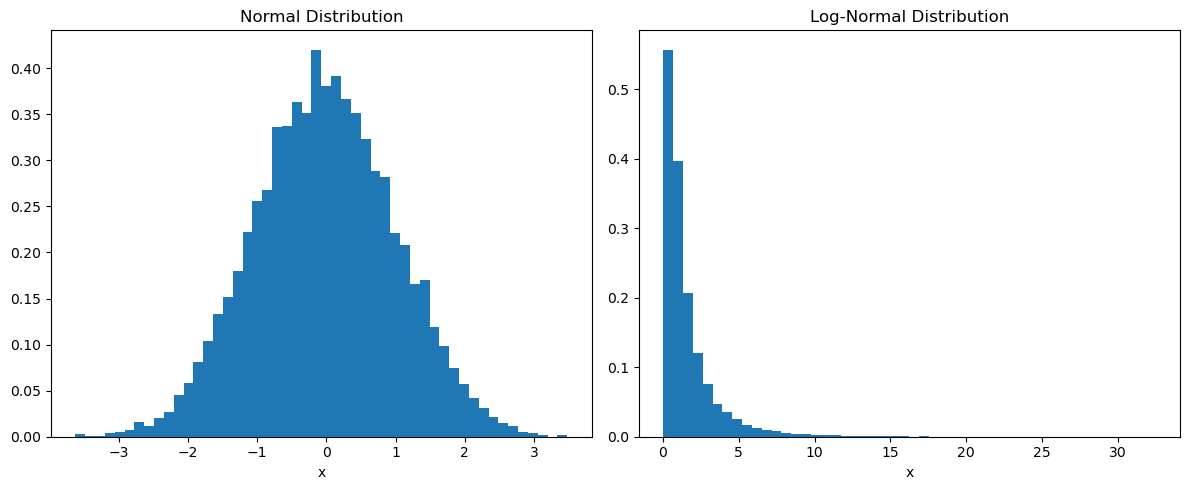

Min of normal: -3.62
Min of log-normal: 0.03


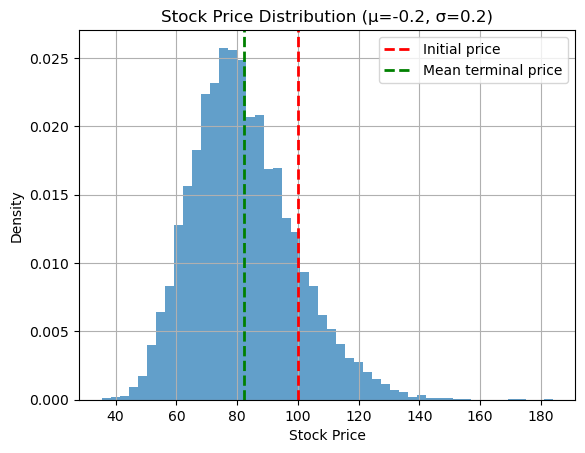

Initial price: $100
Mean terminal price: $82.12
Median terminal price: $80.29
Probability price > $100: 0.145


In [ ]:
# Exercise 1: Generate log-normal
# If X ~ N(μ, σ²), then e^X ~ LogNormal
import numpy as np
import matplotlib.pyplot as plt

normal_samples = np.random.normal(0, 1, 10000)
lognormal_samples = np.exp(normal_samples)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(normal_samples, bins=50, density=True)
plt.title('Normal Distribution')
plt.xlabel('x')

plt.subplot(1, 2, 2)
plt.hist(lognormal_samples, bins=50, density=True)
plt.title('Log-Normal Distribution')
plt.xlabel('x')
plt.tight_layout()
plt.show()

# Key insight: Log-normal is skewed right, always positive
print(f"Min of normal: {np.min(normal_samples):.2f}")
print(f"Min of log-normal: {np.min(lognormal_samples):.2f}")  # Always > 0

# Exercise 2: Stock prices are log-normal
# Simulate stock price after 1 year
S0 = 100           # Initial price
mu = 0.10          # Expected return
sigma = 0.20       # Volatility
T = 1              # Time

# Stock price: S(T) = S0 * exp((mu - 0.5*sigma²)*T + sigma*sqrt(T)*Z)
Z = np.random.normal(0, 1, 10000)
S_T = S0 * np.exp((mu - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)

plt.hist(S_T, bins=50, density=True, alpha=0.7)
plt.axvline(S0, color='r', linestyle='--', linewidth=2, label='Initial price')
plt.axvline(np.mean(S_T), color='g', linestyle='--', linewidth=2, label='Mean terminal price')
plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.title(f'Stock Price Distribution (μ={mu}, σ={sigma})')
plt.legend()
plt.grid(True)
plt.show()

print(f"Initial price: ${S0}")
print(f"Mean terminal price: ${np.mean(S_T):.2f}")
print(f"Median terminal price: ${np.median(S_T):.2f}")
print(f"Probability price > ${S0}: {np.mean(S_T > S0):.3f}")

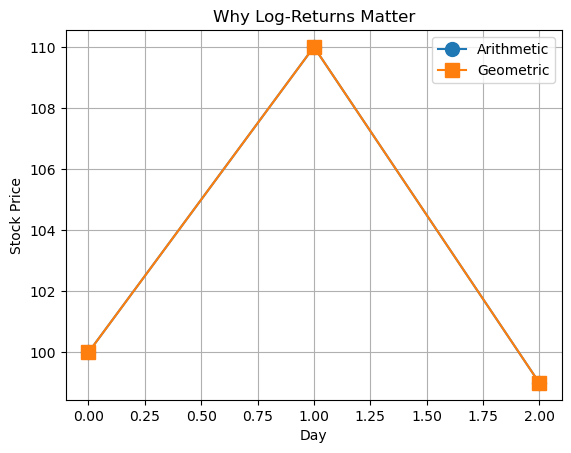

In [51]:
# Exercise: Compare arithmetic vs geometric returns

# Scenario 1: Stock with arithmetic returns
# Day 1: +10%, Day 2: -10%
price_arithmetic = [100]
price_arithmetic.append(price_arithmetic[-1] * 1.10)  # $110
price_arithmetic.append(price_arithmetic[-1] * 0.90)  # $99

# Scenario 2: Stock with log-returns
log_returns = [np.log(1.10), np.log(0.90)]
price_geometric = [100]
for lr in log_returns:
    price_geometric.append(price_geometric[-1] * np.exp(lr))

plt.plot(price_arithmetic, 'o-', label='Arithmetic', markersize=10)
plt.plot(price_geometric, 's-', label='Geometric', markersize=10)
plt.xlabel('Day')
plt.ylabel('Stock Price')
plt.title('Why Log-Returns Matter')
plt.legend()
plt.grid(True)
plt.show()

# Key insight: Arithmetic mean of returns ≠ geometric mean
# Log-returns are additive, which is why we use them

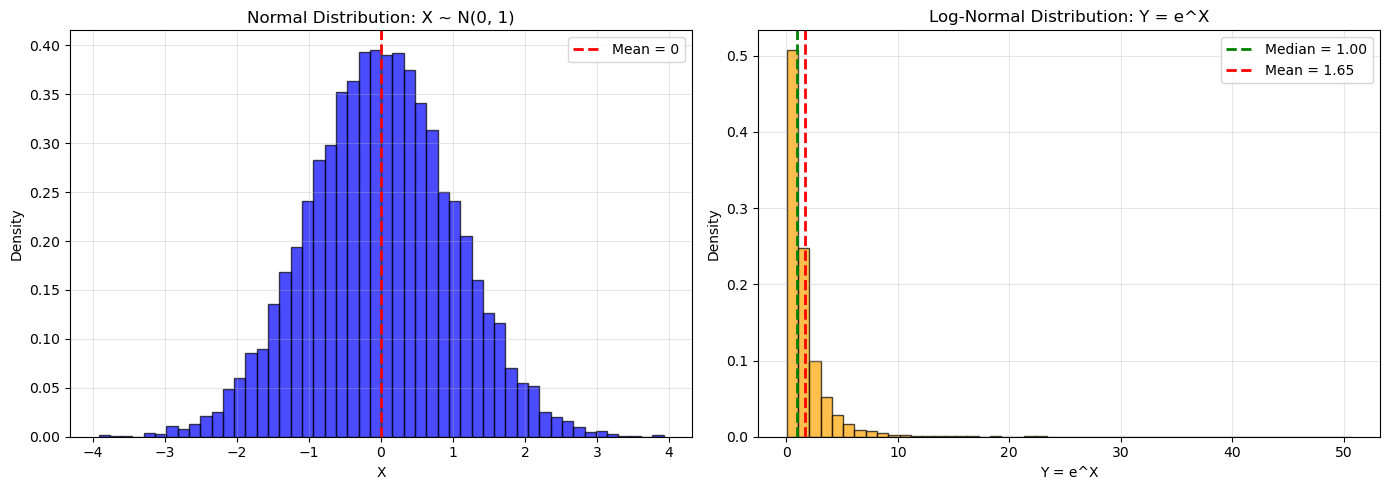

Normal Distribution (X):
  Mean: -0.002
  Median: -0.003
  Std: 1.003
  Min: -3.922
  Max: 3.926

Log-Normal Distribution (Y = e^X):
  Mean: 1.653
  Median: 0.997
  Std: 2.192
  Min: 0.020 (ALWAYS > 0!)
  Max: 50.716

Key Insight: Log-normal is ALWAYS POSITIVE and RIGHT-SKEWED
Mean > Median: 1.653 > 0.997


In [52]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================
# Week 1 Day 5: Log-Normal Distribution
# Using ONLY NumPy (no scipy)
# ============================================

## Exercise 1: The fundamental relationship
# If X ~ N(μ, σ²), then Y = e^X ~ LogNormal

np.random.seed(42)

# Generate normal samples
mu = 0
sigma = 1
n_samples = 10000

X = np.random.normal(mu, sigma, n_samples)

# Transform to log-normal
Y = np.exp(X)

# Display both distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Normal distribution
ax1.hist(X, bins=50, density=True, alpha=0.7, edgecolor='black', color='blue')
ax1.axvline(0, color='red', linestyle='--', linewidth=2, label='Mean = 0')
ax1.set_xlabel('X')
ax1.set_ylabel('Density')
ax1.set_title('Normal Distribution: X ~ N(0, 1)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Log-normal distribution
ax2.hist(Y, bins=50, density=True, alpha=0.7, edgecolor='black', color='orange')
ax2.axvline(np.median(Y), color='green', linestyle='--', linewidth=2, 
            label=f'Median = {np.median(Y):.2f}')
ax2.axvline(np.mean(Y), color='red', linestyle='--', linewidth=2, 
            label=f'Mean = {np.mean(Y):.2f}')
ax2.set_xlabel('Y = e^X')
ax2.set_ylabel('Density')
ax2.set_title('Log-Normal Distribution: Y = e^X')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key observations
print("Normal Distribution (X):")
print(f"  Mean: {np.mean(X):.3f}")
print(f"  Median: {np.median(X):.3f}")
print(f"  Std: {np.std(X):.3f}")
print(f"  Min: {np.min(X):.3f}")
print(f"  Max: {np.max(X):.3f}")
print()
print("Log-Normal Distribution (Y = e^X):")
print(f"  Mean: {np.mean(Y):.3f}")
print(f"  Median: {np.median(Y):.3f}")
print(f"  Std: {np.std(Y):.3f}")
print(f"  Min: {np.min(Y):.3f} (ALWAYS > 0!)")
print(f"  Max: {np.max(Y):.3f}")
print()
print("Key Insight: Log-normal is ALWAYS POSITIVE and RIGHT-SKEWED")
print(f"Mean > Median: {np.mean(Y):.3f} > {np.median(Y):.3f}")

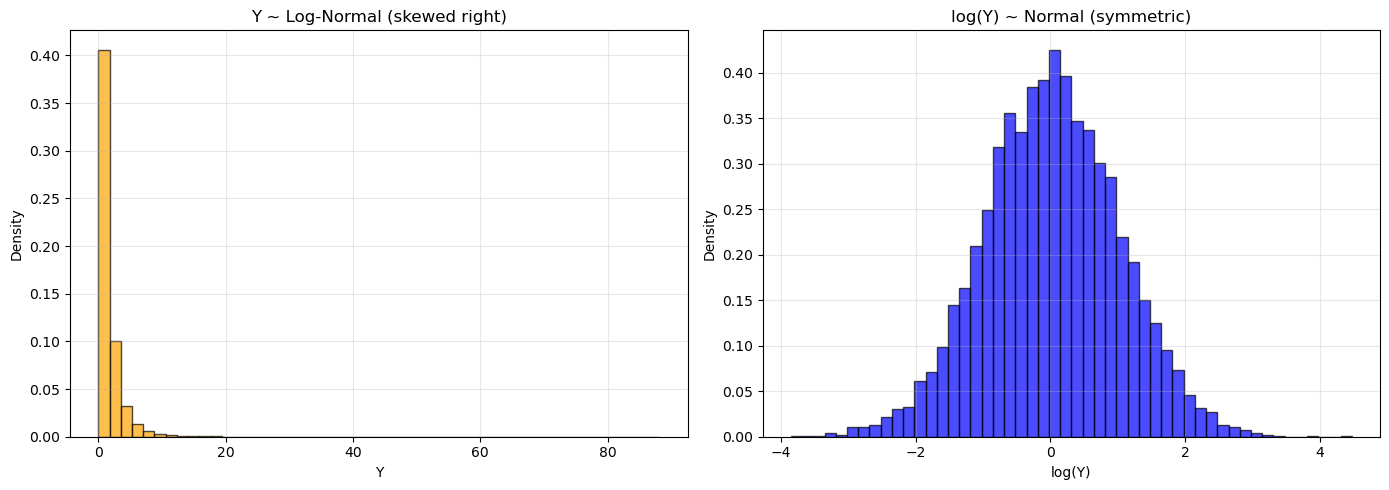

Original (Log-Normal):
  Mean: 1.676
  Std: 2.313
  Skewness: RIGHT (long tail to right)

After log transform (Normal):
  Mean: 0.014 (should be ~0)
  Std: 1.001 (should be ~1)
  Skewness: NONE (symmetric)

Key Insight: log() converts log-normal → normal


In [53]:
## Exercise 2: If Y is log-normal, then log(Y) is normal

# Start with log-normal data
Y = np.exp(np.random.normal(0, 1, 10000))

# Take natural log
log_Y = np.log(Y)

# Verify it's normal
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Log-normal (original)
ax1.hist(Y, bins=50, density=True, alpha=0.7, edgecolor='black', color='orange')
ax1.set_xlabel('Y')
ax1.set_ylabel('Density')
ax1.set_title('Y ~ Log-Normal (skewed right)')
ax1.grid(True, alpha=0.3)

# Normal (after log transform)
ax2.hist(log_Y, bins=50, density=True, alpha=0.7, edgecolor='black', color='blue')
ax2.set_xlabel('log(Y)')
ax2.set_ylabel('Density')
ax2.set_title('log(Y) ~ Normal (symmetric)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Original (Log-Normal):")
print(f"  Mean: {np.mean(Y):.3f}")
print(f"  Std: {np.std(Y):.3f}")
print(f"  Skewness: RIGHT (long tail to right)")
print()
print("After log transform (Normal):")
print(f"  Mean: {np.mean(log_Y):.3f} (should be ~0)")
print(f"  Std: {np.std(log_Y):.3f} (should be ~1)")
print(f"  Skewness: NONE (symmetric)")
print()
print("Key Insight: log() converts log-normal → normal")

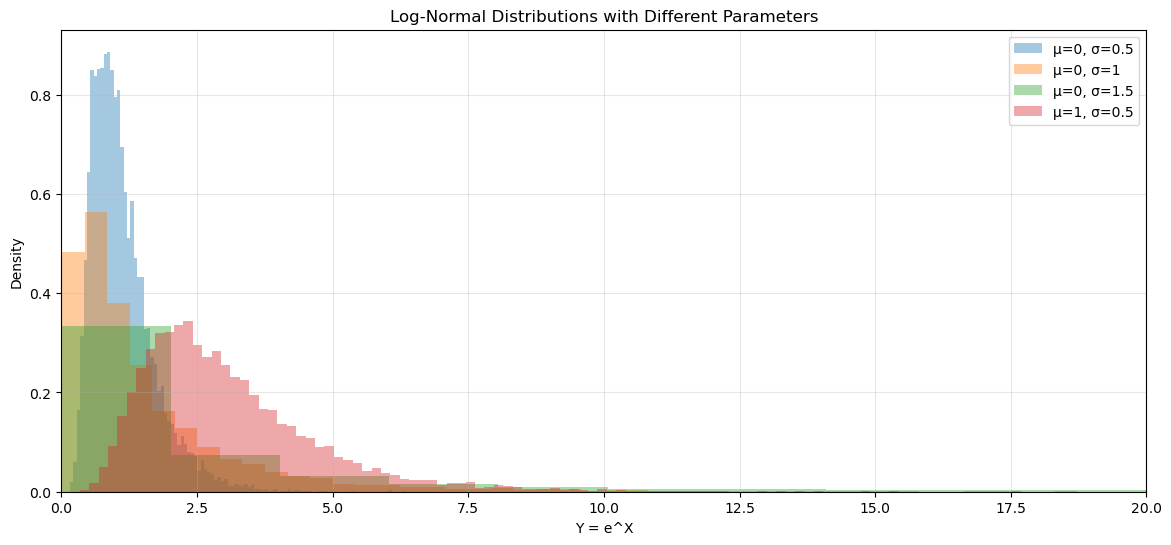

Effect of parameters on log-normal:
------------------------------------------------------------
Normal: N(0, 0.5²) → Log-Normal:
  Median: 1.010 (= e^μ = 1.000)
  Mean: 1.138
  Std: 0.600

Normal: N(0, 1²) → Log-Normal:
  Median: 0.995 (= e^μ = 1.000)
  Mean: 1.659
  Std: 2.136

Normal: N(0, 1.5²) → Log-Normal:
  Median: 0.989 (= e^μ = 1.000)
  Mean: 3.165
  Std: 9.214

Normal: N(1, 0.5²) → Log-Normal:
  Median: 2.714 (= e^μ = 2.718)
  Mean: 3.071
  Std: 1.640

Key Insights:
- Larger σ → more right-skewed, higher variance
- Median = e^μ (easy to calculate!)
- Mean > Median (always for log-normal)


In [54]:
## Exercise 3: How do μ and σ of the underlying normal affect the log-normal?

# Try different parameters
params = [
    (0, 0.5),   # Low variance
    (0, 1),     # Medium variance
    (0, 1.5),   # High variance
    (1, 0.5),   # Shifted mean
]

plt.figure(figsize=(14, 6))

for mu, sigma in params:
    X = np.random.normal(mu, sigma, 10000)
    Y = np.exp(X)
    plt.hist(Y, bins=100, density=True, alpha=0.4, 
             label=f'μ={mu}, σ={sigma}')

plt.xlabel('Y = e^X')
plt.ylabel('Density')
plt.title('Log-Normal Distributions with Different Parameters')
plt.xlim(0, 20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Detailed analysis for each
print("Effect of parameters on log-normal:")
print("-" * 60)
for mu, sigma in params:
    X = np.random.normal(mu, sigma, 10000)
    Y = np.exp(X)
    print(f"Normal: N({mu}, {sigma}²) → Log-Normal:")
    print(f"  Median: {np.median(Y):.3f} (= e^μ = {np.exp(mu):.3f})")
    print(f"  Mean: {np.mean(Y):.3f}")
    print(f"  Std: {np.std(Y):.3f}")
    print()

print("Key Insights:")
print("- Larger σ → more right-skewed, higher variance")
print("- Median = e^μ (easy to calculate!)")
print("- Mean > Median (always for log-normal)")

If stock prices were normal:
  0 out of 1000 paths go negative!
  That's 0.0% of paths
  Minimum price seen: $5.64

This is IMPOSSIBLE in reality - you can't have negative stock prices!
(At worst, a company goes bankrupt and price goes to $0)


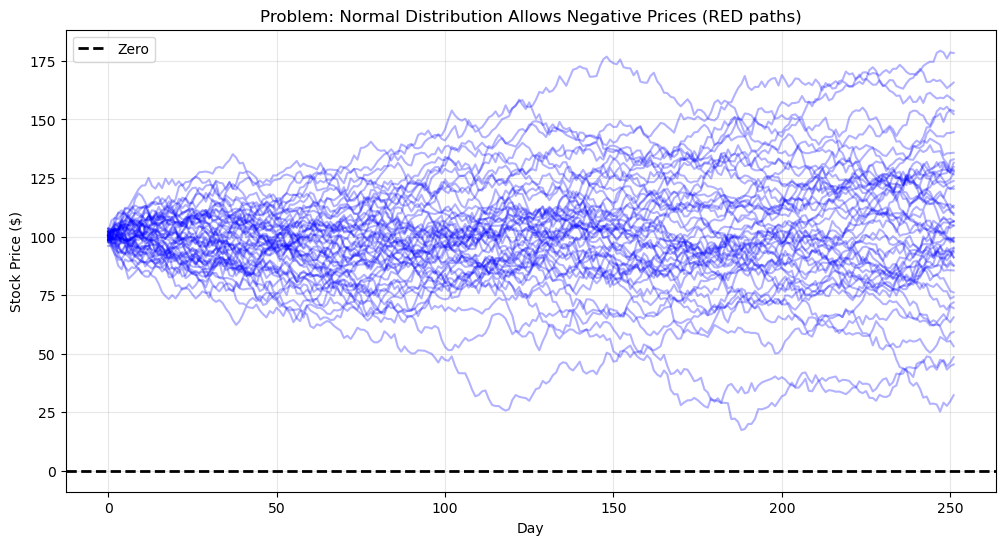

In [55]:
## Exercise 4: Why stock prices can't be normal

# Simulate stock price with NORMAL distribution (WRONG!)
S0 = 100
n_days = 252
n_paths = 1000

# Wrong approach: assume daily changes are normal
daily_changes = np.random.normal(0, 2, (n_paths, n_days))
wrong_prices = S0 + np.cumsum(daily_changes, axis=1)

# How many paths go negative?
n_negative = np.sum(np.any(wrong_prices < 0, axis=1))
print(f"If stock prices were normal:")
print(f"  {n_negative} out of {n_paths} paths go negative!")
print(f"  That's {100 * n_negative / n_paths:.1f}% of paths")
print(f"  Minimum price seen: ${np.min(wrong_prices):.2f}")
print()
print("This is IMPOSSIBLE in reality - you can't have negative stock prices!")
print("(At worst, a company goes bankrupt and price goes to $0)")

# Visualize the problem
plt.figure(figsize=(12, 6))
for i in range(min(50, n_paths)):
    plt.plot(wrong_prices[i], alpha=0.3, color='red' if np.any(wrong_prices[i] < 0) else 'blue')
plt.axhline(0, color='black', linestyle='--', linewidth=2, label='Zero')
plt.xlabel('Day')
plt.ylabel('Stock Price ($)')
plt.title('Problem: Normal Distribution Allows Negative Prices (RED paths)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

With log-normal model:
  0 out of 1000 paths go negative
  Minimum price seen: $57.44
  Maximum price seen: $208.19

Success! All prices stay positive ✓


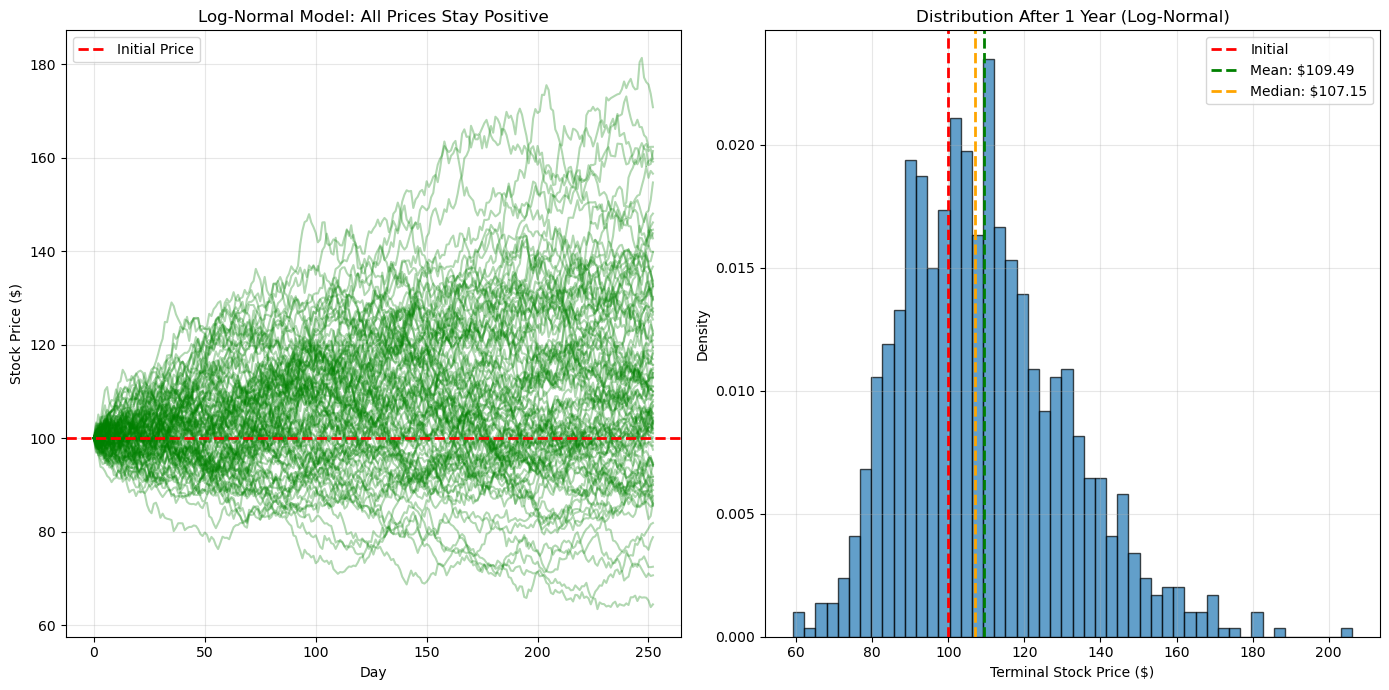

In [56]:
## Exercise 5: Stock prices with log-normal (CORRECT)

S0 = 100
mu = 0.10 / 252  # Daily drift (10% annual)
sigma = 0.20 / np.sqrt(252)  # Daily volatility (20% annual)
n_days = 252
n_paths = 1000

# Correct approach: log-returns are normal
stock_paths = np.zeros((n_paths, n_days + 1))
stock_paths[:, 0] = S0

for day in range(1, n_days + 1):
    # Generate normal log-returns
    log_returns = np.random.normal((mu - 0.5*sigma**2), sigma, n_paths)
    
    # Update stock price
    stock_paths[:, day] = stock_paths[:, day-1] * np.exp(log_returns)

# Check for negative prices
n_negative = np.sum(np.any(stock_paths < 0, axis=1))
print(f"With log-normal model:")
print(f"  {n_negative} out of {n_paths} paths go negative")
print(f"  Minimum price seen: ${np.min(stock_paths):.2f}")
print(f"  Maximum price seen: ${np.max(stock_paths):.2f}")
print()
print("Success! All prices stay positive ✓")

# Visualize
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
for i in range(min(100, n_paths)):
    plt.plot(stock_paths[i], alpha=0.3, color='green')
plt.axhline(S0, color='red', linestyle='--', linewidth=2, label='Initial Price')
plt.xlabel('Day')
plt.ylabel('Stock Price ($)')
plt.title('Log-Normal Model: All Prices Stay Positive')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(stock_paths[:, -1], bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(S0, color='red', linestyle='--', linewidth=2, label='Initial')
plt.axvline(np.mean(stock_paths[:, -1]), color='green', linestyle='--', 
            linewidth=2, label=f'Mean: ${np.mean(stock_paths[:, -1]):.2f}')
plt.axvline(np.median(stock_paths[:, -1]), color='orange', linestyle='--', 
            linewidth=2, label=f'Median: ${np.median(stock_paths[:, -1]):.2f}')
plt.xlabel('Terminal Stock Price ($)')
plt.ylabel('Density')
plt.title('Distribution After 1 Year (Log-Normal)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [57]:
## Exercise 6: Comparing simple returns vs log-returns

# Scenario: Stock goes up 50% then down 50%
S0 = 100

# Simple returns
S1_simple = S0 * 1.50  # Up 50%
S2_simple = S1_simple * 0.50  # Down 50%

print("Simple Returns:")
print(f"  Start: ${S0}")
print(f"  After +50%: ${S1_simple}")
print(f"  After -50%: ${S2_simple}")
print(f"  Total return: {(S2_simple - S0) / S0 * 100:.1f}%")
print(f"  Average return: {(0.50 - 0.50) / 2 * 100:.1f}%")
print(f"  Problem: +50% then -50% does NOT get you back to start!")
print()

# Log returns
log_ret_up = np.log(1.50)
log_ret_down = np.log(0.50)

S1_log = S0 * np.exp(log_ret_up)
S2_log = S1_log * np.exp(log_ret_down)

print("Log Returns:")
print(f"  Start: ${S0}")
print(f"  Log return up: {log_ret_up:.4f}")
print(f"  Log return down: {log_ret_down:.4f}")
print(f"  Sum of log returns: {log_ret_up + log_ret_down:.4f}")
print(f"  After +50%: ${S1_log:.2f}")
print(f"  After -50%: ${S2_log:.2f}")
print(f"  Final price: ${S0 * np.exp(log_ret_up + log_ret_down):.2f}")
print()
print("Notice: log returns are SYMMETRIC")
print(f"  |{log_ret_up:.4f}| ≈ |{log_ret_down:.4f}|")

# Demonstrate additivity
print("\n" + "="*60)
print("ADDITIVITY: Why log-returns are better")
print("="*60)

# 3 consecutive returns
returns = [0.05, 0.03, -0.02]  # +5%, +3%, -2%

# Simple returns - NOT additive
S = S0
for r in returns:
    S = S * (1 + r)
simple_total = (S - S0) / S0
simple_sum = sum(returns)

print("\nSimple Returns:")
print(f"  Individual: {[f'{r*100:.1f}%' for r in returns]}")
print(f"  Naive sum: {simple_sum*100:.2f}%")
print(f"  Actual total: {simple_total*100:.2f}%")
print(f"  Error: {abs(simple_sum - simple_total)*100:.2f}%")

# Log returns - ADDITIVE
log_returns = [np.log(1 + r) for r in returns]
log_total = sum(log_returns)
actual_total = np.exp(log_total) - 1

print("\nLog Returns:")
print(f"  Individual: {[f'{lr:.4f}' for lr in log_returns]}")
print(f"  Sum: {log_total:.4f}")
print(f"  Convert back: {actual_total*100:.2f}%")
print(f"  Actual total: {simple_total*100:.2f}%")
print(f"  Error: {abs(actual_total - simple_total)*100:.4f}% (nearly zero!)")

print("\nKey Insight: Log returns are ADDITIVE")
print("  sum(log returns) = log return of entire period")

Simple Returns:
  Start: $100
  After +50%: $150.0
  After -50%: $75.0
  Total return: -25.0%
  Average return: 0.0%
  Problem: +50% then -50% does NOT get you back to start!

Log Returns:
  Start: $100
  Log return up: 0.4055
  Log return down: -0.6931
  Sum of log returns: -0.2877
  After +50%: $150.00
  After -50%: $75.00
  Final price: $75.00

Notice: log returns are SYMMETRIC
  |0.4055| ≈ |-0.6931|

ADDITIVITY: Why log-returns are better

Simple Returns:
  Individual: ['5.0%', '3.0%', '-2.0%']
  Naive sum: 6.00%
  Actual total: 5.99%
  Error: 0.01%

Log Returns:
  Individual: ['0.0488', '0.0296', '-0.0202']
  Sum: 0.0581
  Convert back: 5.99%
  Actual total: 5.99%
  Error: 0.0000% (nearly zero!)

Key Insight: Log returns are ADDITIVE
  sum(log returns) = log return of entire period


Expected final stock price: S0 * e^(μT) = $110.52

WITHOUT drift correction (μ - σ²/2):
  Mean: $112.83
  Error: $2.32

WITH drift correction (μ - σ²/2):
  Mean: $110.60
  Error: $0.08

The -σ²/2 term is ESSENTIAL to get correct expected value!
This comes from Ito's lemma (you'll learn in Week 3)


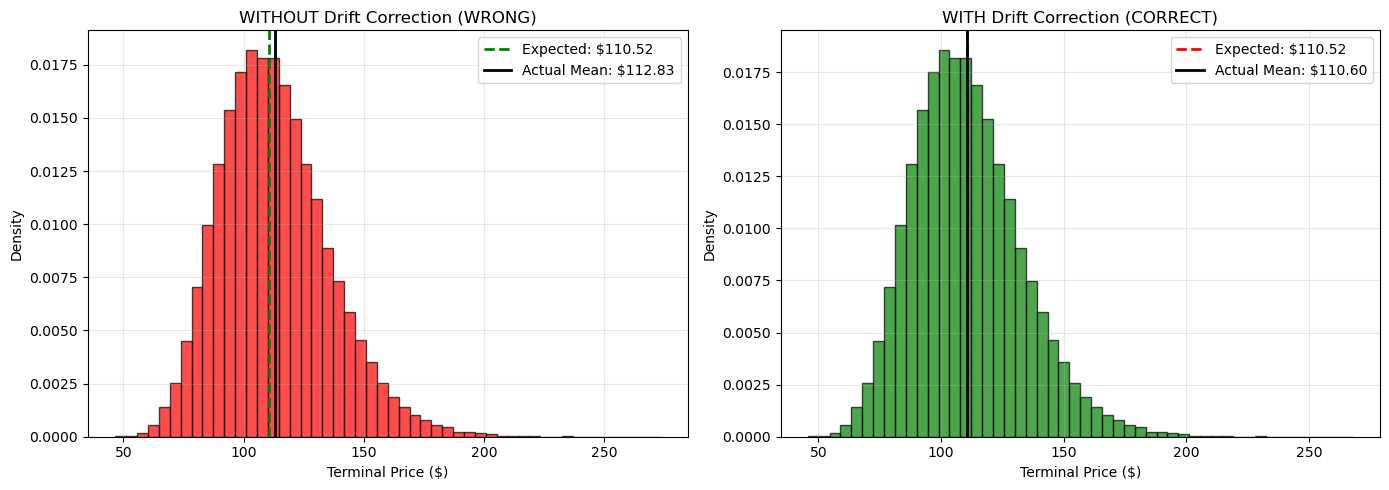

In [58]:
## Exercise 7: Understanding the drift correction

# Without drift correction
S0 = 100
mu = 0.10
sigma = 0.20
T = 1
n_sims = 100000

# WRONG: No drift correction
Z = np.random.normal(0, 1, n_sims)
S_T_wrong = S0 * np.exp(mu * T + sigma * np.sqrt(T) * Z)

# CORRECT: With drift correction
S_T_correct = S0 * np.exp((mu - 0.5*sigma**2) * T + sigma * np.sqrt(T) * Z)

# Compare
print("Expected final stock price: S0 * e^(μT) = ${:.2f}".format(S0 * np.exp(mu * T)))
print()
print("WITHOUT drift correction (μ - σ²/2):")
print(f"  Mean: ${np.mean(S_T_wrong):.2f}")
print(f"  Error: ${abs(np.mean(S_T_wrong) - S0 * np.exp(mu * T)):.2f}")
print()
print("WITH drift correction (μ - σ²/2):")
print(f"  Mean: ${np.mean(S_T_correct):.2f}")
print(f"  Error: ${abs(np.mean(S_T_correct) - S0 * np.exp(mu * T)):.2f}")
print()
print("The -σ²/2 term is ESSENTIAL to get correct expected value!")
print("This comes from Ito's lemma (you'll learn in Week 3)")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.hist(S_T_wrong, bins=50, density=True, alpha=0.7, edgecolor='black', color='red')
ax1.axvline(S0 * np.exp(mu * T), color='green', linestyle='--', linewidth=2, 
            label=f'Expected: ${S0 * np.exp(mu * T):.2f}')
ax1.axvline(np.mean(S_T_wrong), color='black', linestyle='-', linewidth=2, 
            label=f'Actual Mean: ${np.mean(S_T_wrong):.2f}')
ax1.set_xlabel('Terminal Price ($)')
ax1.set_ylabel('Density')
ax1.set_title('WITHOUT Drift Correction (WRONG)')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.hist(S_T_correct, bins=50, density=True, alpha=0.7, edgecolor='black', color='green')
ax2.axvline(S0 * np.exp(mu * T), color='red', linestyle='--', linewidth=2, 
            label=f'Expected: ${S0 * np.exp(mu * T):.2f}')
ax2.axvline(np.mean(S_T_correct), color='black', linestyle='-', linewidth=2, 
            label=f'Actual Mean: ${np.mean(S_T_correct):.2f}')
ax2.set_xlabel('Terminal Price ($)')
ax2.set_ylabel('Density')
ax2.set_title('WITH Drift Correction (CORRECT)')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Simulation Results:
  Initial price: $100
  Expected terminal price: $112.75
  Actual mean: $111.56
  Median: $108.65
  Std: $29.10
  Min: $46.85
  Max: $258.47

  P(profit): 61.00%
  P(double): 1.20%
  P(lose 50%+): 0.20%


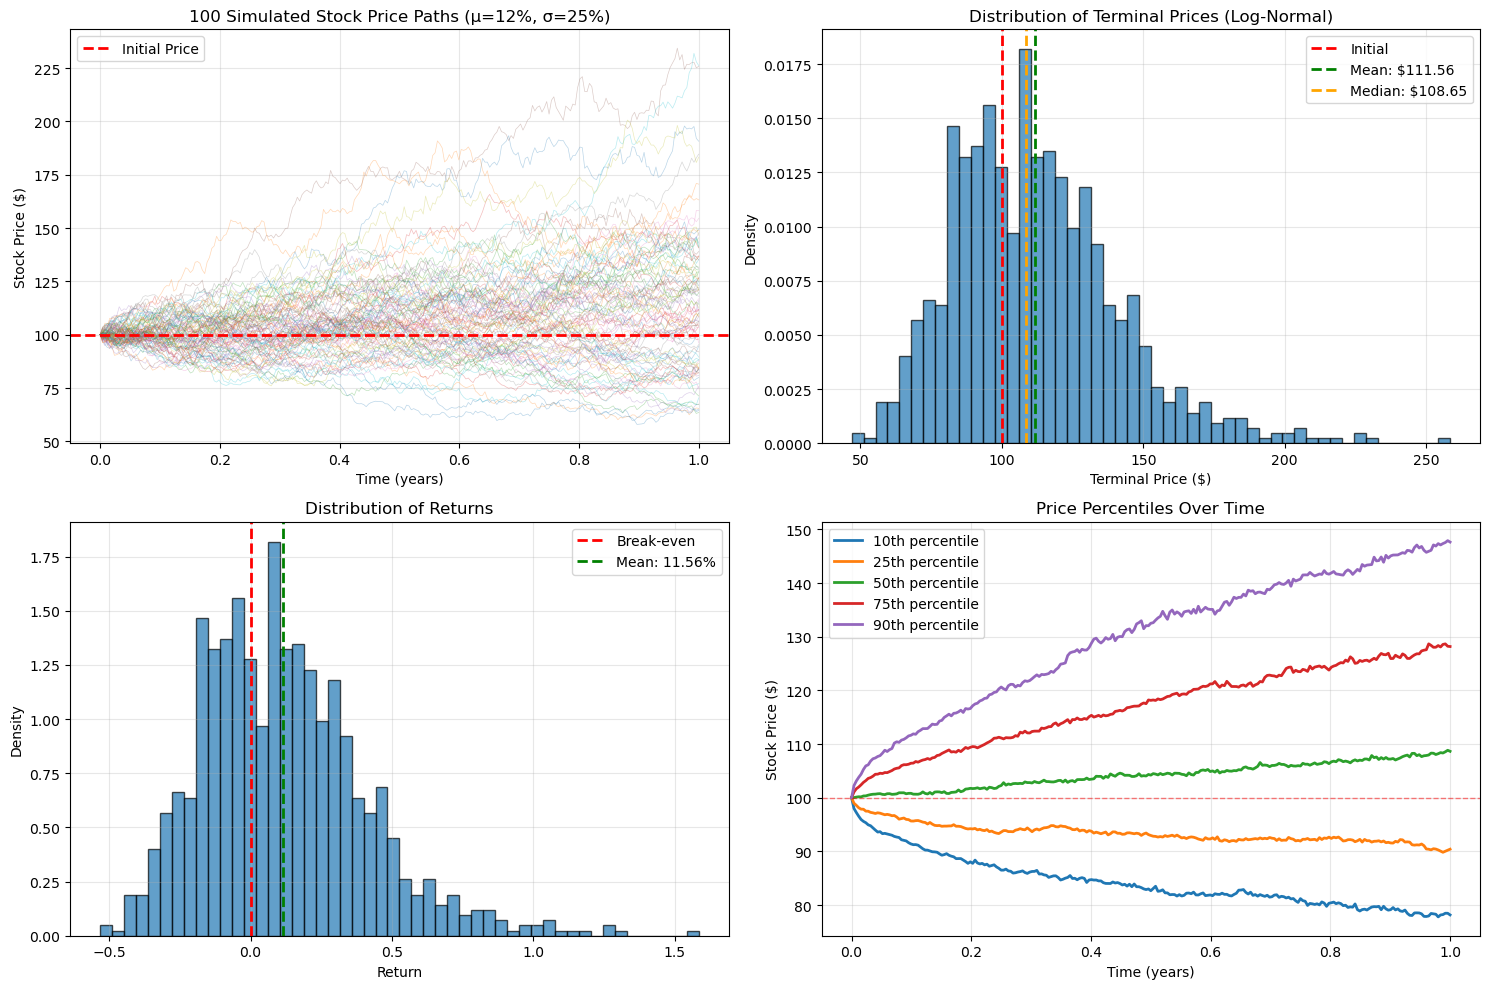

In [59]:
## Exercise 8: Simulate and analyze multiple stock price paths

def simulate_stock_price(S0, mu, sigma, T, n_steps, n_paths):
    """
    Simulate stock price paths using geometric Brownian motion
    
    S0: initial price
    mu: annual drift (expected return)
    sigma: annual volatility
    T: time horizon (years)
    n_steps: number of time steps
    n_paths: number of paths to simulate
    """
    dt = T / n_steps
    t = np.linspace(0, T, n_steps + 1)
    
    # Initialize paths
    paths = np.zeros((n_paths, n_steps + 1))
    paths[:, 0] = S0
    
    # Simulate each step
    for i in range(1, n_steps + 1):
        # Generate random increments
        Z = np.random.normal(0, 1, n_paths)
        
        # Update price using exact solution
        paths[:, i] = paths[:, i-1] * np.exp(
            (mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*Z
        )
    
    return t, paths

# Simulate
S0 = 100
mu = 0.12  # 12% expected return
sigma = 0.25  # 25% volatility
T = 1  # 1 year
n_steps = 252  # Daily steps
n_paths = 1000

t, paths = simulate_stock_price(S0, mu, sigma, T, n_steps, n_paths)

# Analysis
terminal_prices = paths[:, -1]

print("Simulation Results:")
print(f"  Initial price: ${S0}")
print(f"  Expected terminal price: ${S0 * np.exp(mu * T):.2f}")
print(f"  Actual mean: ${np.mean(terminal_prices):.2f}")
print(f"  Median: ${np.median(terminal_prices):.2f}")
print(f"  Std: ${np.std(terminal_prices):.2f}")
print(f"  Min: ${np.min(terminal_prices):.2f}")
print(f"  Max: ${np.max(terminal_prices):.2f}")
print()
print(f"  P(profit): {np.mean(terminal_prices > S0):.2%}")
print(f"  P(double): {np.mean(terminal_prices > 2*S0):.2%}")
print(f"  P(lose 50%+): {np.mean(terminal_prices < 0.5*S0):.2%}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Sample paths
ax = axes[0, 0]
for i in range(min(100, n_paths)):
    ax.plot(t, paths[i], alpha=0.3, linewidth=0.5)
ax.axhline(S0, color='red', linestyle='--', linewidth=2, label='Initial Price')
ax.set_xlabel('Time (years)')
ax.set_ylabel('Stock Price ($)')
ax.set_title(f'100 Simulated Stock Price Paths (μ={mu:.0%}, σ={sigma:.0%})')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Terminal distribution
ax = axes[0, 1]
ax.hist(terminal_prices, bins=50, density=True, alpha=0.7, edgecolor='black')
ax.axvline(S0, color='red', linestyle='--', linewidth=2, label='Initial')
ax.axvline(np.mean(terminal_prices), color='green', linestyle='--', linewidth=2, 
           label=f'Mean: ${np.mean(terminal_prices):.2f}')
ax.axvline(np.median(terminal_prices), color='orange', linestyle='--', linewidth=2, 
           label=f'Median: ${np.median(terminal_prices):.2f}')
ax.set_xlabel('Terminal Price ($)')
ax.set_ylabel('Density')
ax.set_title('Distribution of Terminal Prices (Log-Normal)')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Returns distribution
returns = (terminal_prices - S0) / S0
ax = axes[1, 0]
ax.hist(returns, bins=50, density=True, alpha=0.7, edgecolor='black')
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Break-even')
ax.axvline(np.mean(returns), color='green', linestyle='--', linewidth=2, 
           label=f'Mean: {np.mean(returns):.2%}')
ax.set_xlabel('Return')
ax.set_ylabel('Density')
ax.set_title('Distribution of Returns')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 4: Percentiles over time
ax = axes[1, 1]
percentiles = [10, 25, 50, 75, 90]
for p in percentiles:
    values = np.percentile(paths, p, axis=0)
    ax.plot(t, values, label=f'{p}th percentile', linewidth=2)
ax.axhline(S0, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax.set_xlabel('Time (years)')
ax.set_ylabel('Stock Price ($)')
ax.set_title('Price Percentiles Over Time')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Volatility = 10%:
  Mean: $110.40
  Median: $109.95
  Std: $11.03
  P(profit): 82.75%
  P(double): 0.00%
  P(lose 50%+): 0.00%

Volatility = 20%:
  Mean: $110.27
  Median: $108.11
  Std: $22.26
  P(profit): 65.30%
  P(double): 0.16%
  P(lose 50%+): 0.01%

Volatility = 30%:
  Mean: $110.26
  Median: $105.90
  Std: $33.39
  P(profit): 57.75%
  P(double): 1.53%
  P(lose 50%+): 0.62%

Volatility = 50%:
  Mean: $110.10
  Median: $96.72
  Std: $58.02
  P(profit): 47.34%
  P(double): 7.81%
  P(lose 50%+): 8.86%



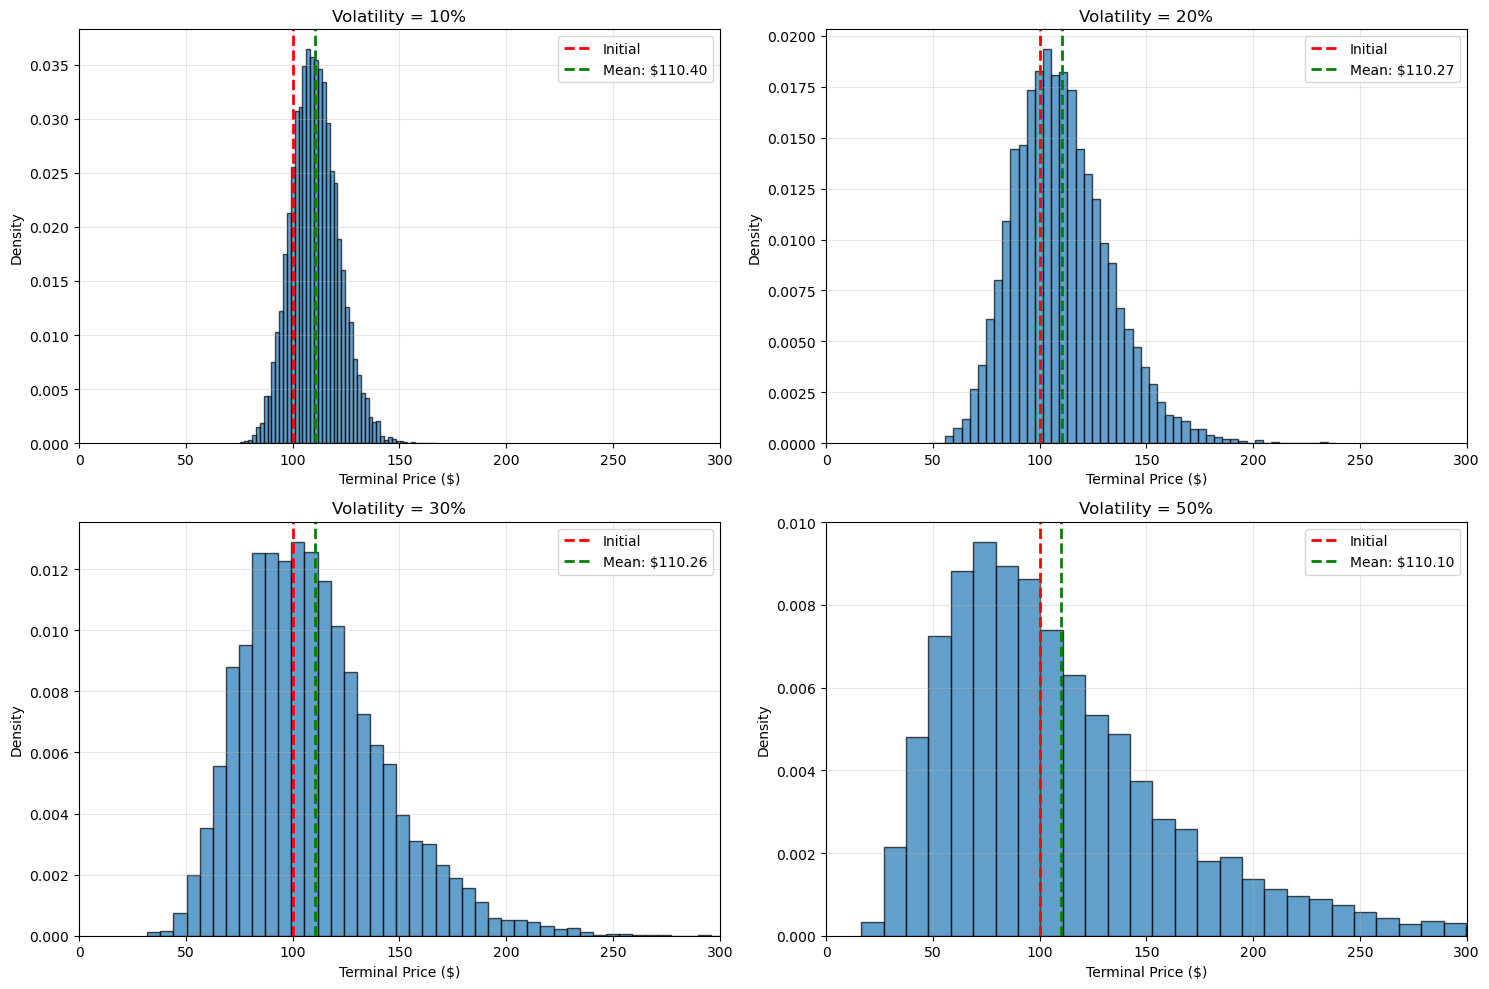

Key Insight: Higher volatility →
  - Same mean (if same μ)
  - Much wider distribution
  - Higher chance of extreme outcomes (both good and bad)


In [60]:
## Exercise 9: How does volatility affect outcomes?

S0 = 100
mu = 0.10
volatilities = [0.10, 0.20, 0.30, 0.50]
T = 1
n_sims = 10000

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for idx, sigma in enumerate(volatilities):
    # Simulate
    Z = np.random.normal(0, 1, n_sims)
    S_T = S0 * np.exp((mu - 0.5*sigma**2)*T + sigma*np.sqrt(T)*Z)
    
    # Plot
    ax = axes[idx]
    ax.hist(S_T, bins=50, density=True, alpha=0.7, edgecolor='black')
    ax.axvline(S0, color='red', linestyle='--', linewidth=2, label='Initial')
    ax.axvline(np.mean(S_T), color='green', linestyle='--', linewidth=2, 
               label=f'Mean: ${np.mean(S_T):.2f}')
    ax.set_xlabel('Terminal Price ($)')
    ax.set_ylabel('Density')
    ax.set_title(f'Volatility = {sigma:.0%}')
    ax.set_xlim(0, 300)
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Print stats
    print(f"Volatility = {sigma:.0%}:")
    print(f"  Mean: ${np.mean(S_T):.2f}")
    print(f"  Median: ${np.median(S_T):.2f}")
    print(f"  Std: ${np.std(S_T):.2f}")
    print(f"  P(profit): {np.mean(S_T > S0):.2%}")
    print(f"  P(double): {np.mean(S_T > 2*S0):.2%}")
    print(f"  P(lose 50%+): {np.mean(S_T < 0.5*S0):.2%}")
    print()

plt.tight_layout()
plt.show()

print("Key Insight: Higher volatility →")
print("  - Same mean (if same μ)")
print("  - Much wider distribution")
print("  - Higher chance of extreme outcomes (both good and bad)")

Initial Portfolio Value: $3,850.00

Portfolio After 1 Year:
  Mean: $4,401.77
  Median: $4,313.27
  Std: $805.35

  5th percentile (bad outcome): $3,266.03
  95th percentile (good outcome): $5,854.98

  P(profit): 74.46%
  P(gain 20%+): 34.73%
  P(lose 20%+): 2.29%


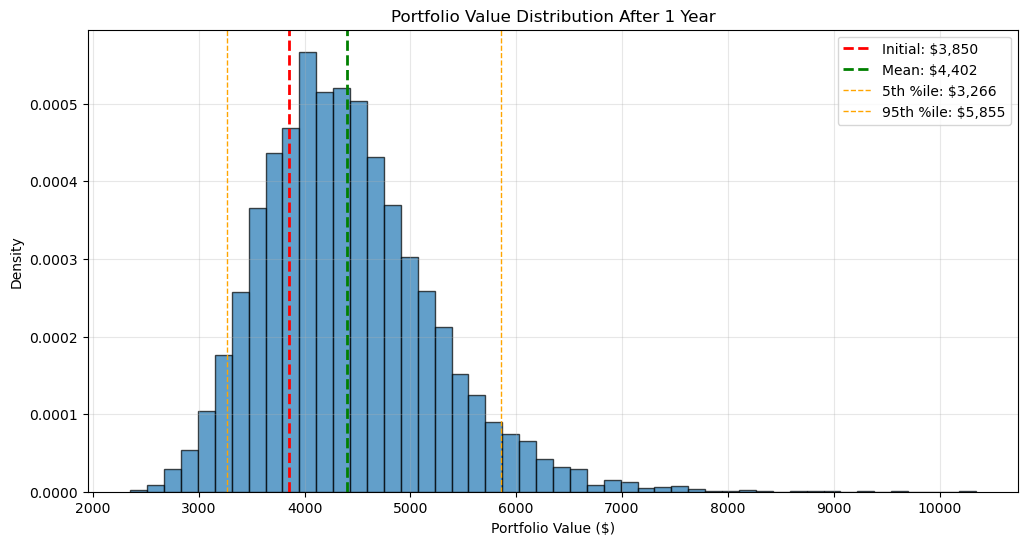

In [61]:
## Exercise 10: Portfolio of multiple stocks

# You own 3 stocks
stocks = {
    'Tech Stock': {'shares': 10, 'price': 150, 'mu': 0.15, 'sigma': 0.35},
    'Blue Chip': {'shares': 20, 'price': 80, 'mu': 0.08, 'sigma': 0.15},
    'Growth': {'shares': 15, 'price': 50, 'mu': 0.20, 'sigma': 0.45},
}

# Calculate initial portfolio value
initial_portfolio = sum(s['shares'] * s['price'] for s in stocks.values())
print(f"Initial Portfolio Value: ${initial_portfolio:,.2f}")
print()

# Simulate 1 year forward
T = 1
n_sims = 10000

portfolio_values = np.zeros(n_sims)

for sim in range(n_sims):
    portfolio_value = 0
    
    for stock_name, stock in stocks.items():
        # Simulate final price
        Z = np.random.normal(0, 1)
        final_price = stock['price'] * np.exp(
            (stock['mu'] - 0.5*stock['sigma']**2)*T + 
            stock['sigma']*np.sqrt(T)*Z
        )
        
        # Add to portfolio
        portfolio_value += stock['shares'] * final_price
    
    portfolio_values[sim] = portfolio_value

# Analysis
print("Portfolio After 1 Year:")
print(f"  Mean: ${np.mean(portfolio_values):,.2f}")
print(f"  Median: ${np.median(portfolio_values):,.2f}")
print(f"  Std: ${np.std(portfolio_values):,.2f}")
print()
print(f"  5th percentile (bad outcome): ${np.percentile(portfolio_values, 5):,.2f}")
print(f"  95th percentile (good outcome): ${np.percentile(portfolio_values, 95):,.2f}")
print()
print(f"  P(profit): {np.mean(portfolio_values > initial_portfolio):.2%}")
print(f"  P(gain 20%+): {np.mean(portfolio_values > initial_portfolio * 1.2):.2%}")
print(f"  P(lose 20%+): {np.mean(portfolio_values < initial_portfolio * 0.8):.2%}")

# Visualize
plt.figure(figsize=(12, 6))
plt.hist(portfolio_values, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(initial_portfolio, color='red', linestyle='--', linewidth=2, 
            label=f'Initial: ${initial_portfolio:,.0f}')
plt.axvline(np.mean(portfolio_values), color='green', linestyle='--', linewidth=2, 
            label=f'Mean: ${np.mean(portfolio_values):,.0f}')
plt.axvline(np.percentile(portfolio_values, 5), color='orange', linestyle='--', linewidth=1, 
            label=f'5th %ile: ${np.percentile(portfolio_values, 5):,.0f}')
plt.axvline(np.percentile(portfolio_values, 95), color='orange', linestyle='--', linewidth=1, 
            label=f'95th %ile: ${np.percentile(portfolio_values, 95):,.0f}')
plt.xlabel('Portfolio Value ($)')
plt.ylabel('Density')
plt.title('Portfolio Value Distribution After 1 Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()